<a href="https://colab.research.google.com/github/celiaqt/Idoven-Data-Scientist-CeliaQuero/blob/main/Idoven_Data_Science_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Installation of packages and importing libraries**

In [ ]:
pip install wfdb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 KB 13.1 MB/s eta 0:00:00
  Attempting uninstall: SoundFile
    Found existing installation: soundfile 0.12.1
    Uninstalling soundfile-0.12.1:
      Successfully uninstalled soundfile-0.12.1


In [ ]:
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import os
import wfdb
from wfdb import processing
import sys

**Reading files and annotations**

In [ ]:
record = wfdb.rdrecord('01000_hr', pn_dir='ptb-xl/1.0.2/records500/01000/') # reading the record.
annotation = wfdb.rdann('01000_hr', 'dat',pn_dir='ptb-xl/1.0.2/records500/01000/', sampto = 3000, return_label_elements=['description']) # reading the annotations.


**Plotting the signal and annotations. Formatting the data for professional diagnosis**



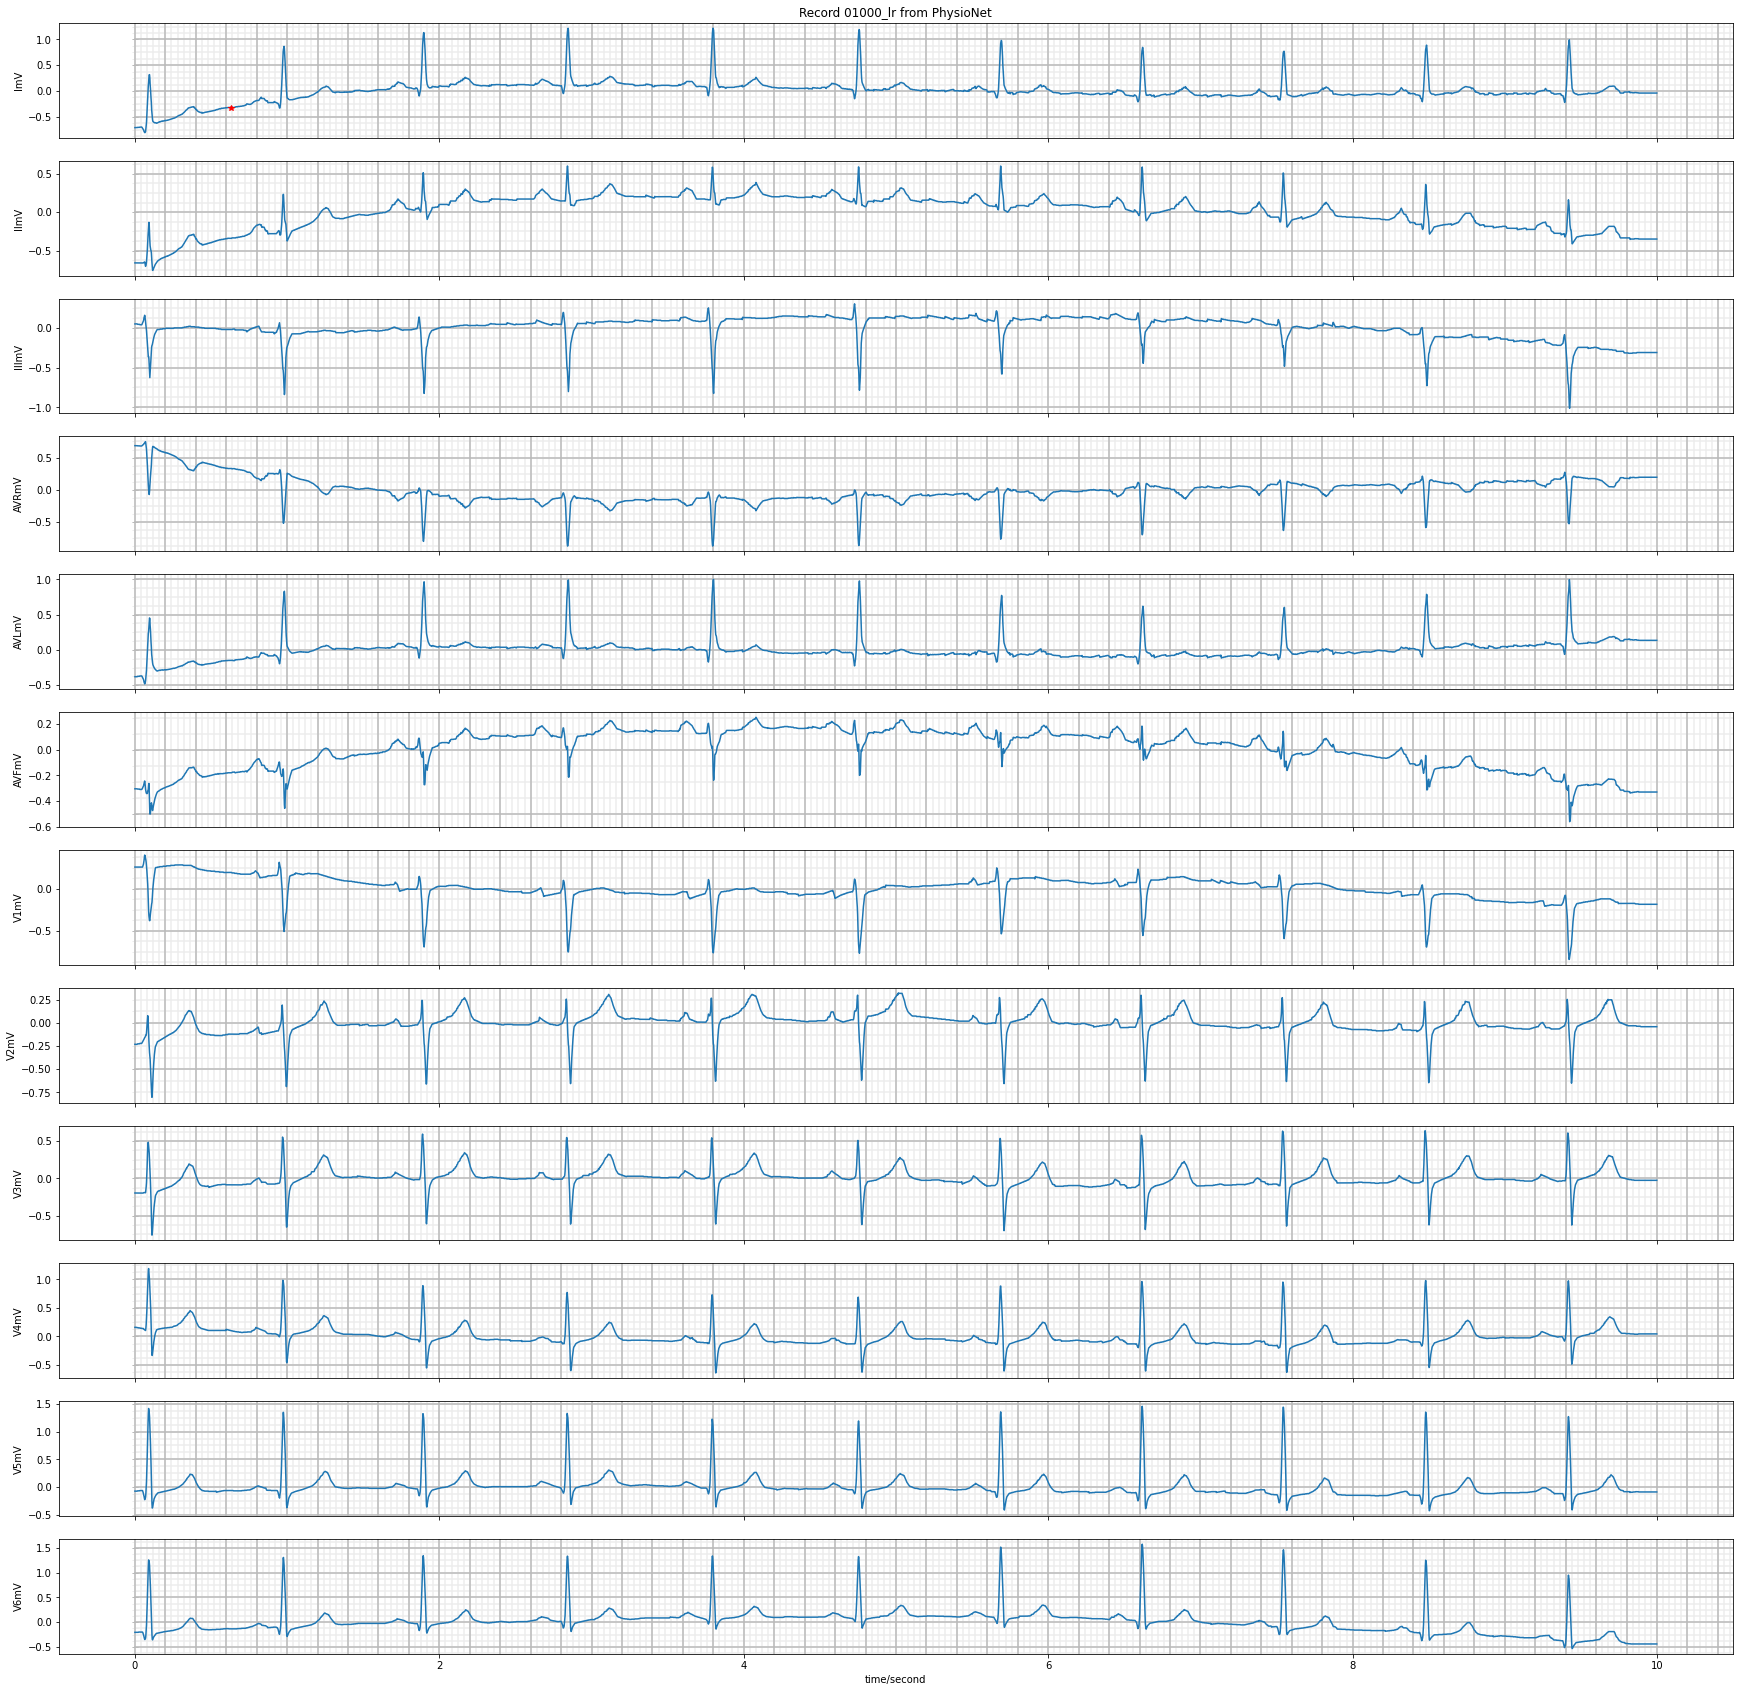

{'record_name': '01000_hr',
 'n_sig': 12,
 'fs': 500,
 'counter_freq': None,
 'base_counter': None,
 'sig_len': 5000,
 'base_time': None,
 'base_date': None,
 'comments': [],
 'sig_name': ['I',
  'II',
  'III',
  'AVR',
  'AVL',
  'AVF',
  'V1',
  'V2',
  'V3',
  'V4',
  'V5',
  'V6'],
 'p_signal': array([[-0.71 , -0.66 ,  0.05 , ...,  0.16 , -0.07 , -0.205],
        [-0.71 , -0.66 ,  0.05 , ...,  0.16 , -0.07 , -0.205],
        [-0.71 , -0.66 ,  0.05 , ...,  0.16 , -0.07 , -0.205],
        ...,
        [-0.04 , -0.35 , -0.31 , ...,  0.045, -0.085, -0.44 ],
        [-0.04 , -0.35 , -0.31 , ...,  0.045, -0.085, -0.44 ],
        [-0.04 , -0.35 , -0.31 , ...,  0.045, -0.085, -0.44 ]]),
 'd_signal': None,
 'e_p_signal': None,
 'e_d_signal': None,
 'file_name': ['01000_hr.dat',
  '01000_hr.dat',
  '01000_hr.dat',
  '01000_hr.dat',
  '01000_hr.dat',
  '01000_hr.dat',
  '01000_hr.dat',
  '01000_hr.dat',
  '01000_hr.dat',
  '01000_hr.dat',
  '01000_hr.dat',
  '01000_hr.dat'],
 'fmt': ['16',
  

In [ ]:
wfdb.plot_wfdb(record=record,annotation= annotation, title='Record 01000_lr from PhysioNet', ecg_grids='all', figsize=(30,30)) #plotting the signals and annotations.
display(record.__dict__)

**Identifying the QRS complex in the signal and being able to annotate on it.**

Learning initial signal parameters...
Failed to find 8 beats during learning.
Initializing using default parameters
Running QRS detection...
QRS detection complete.


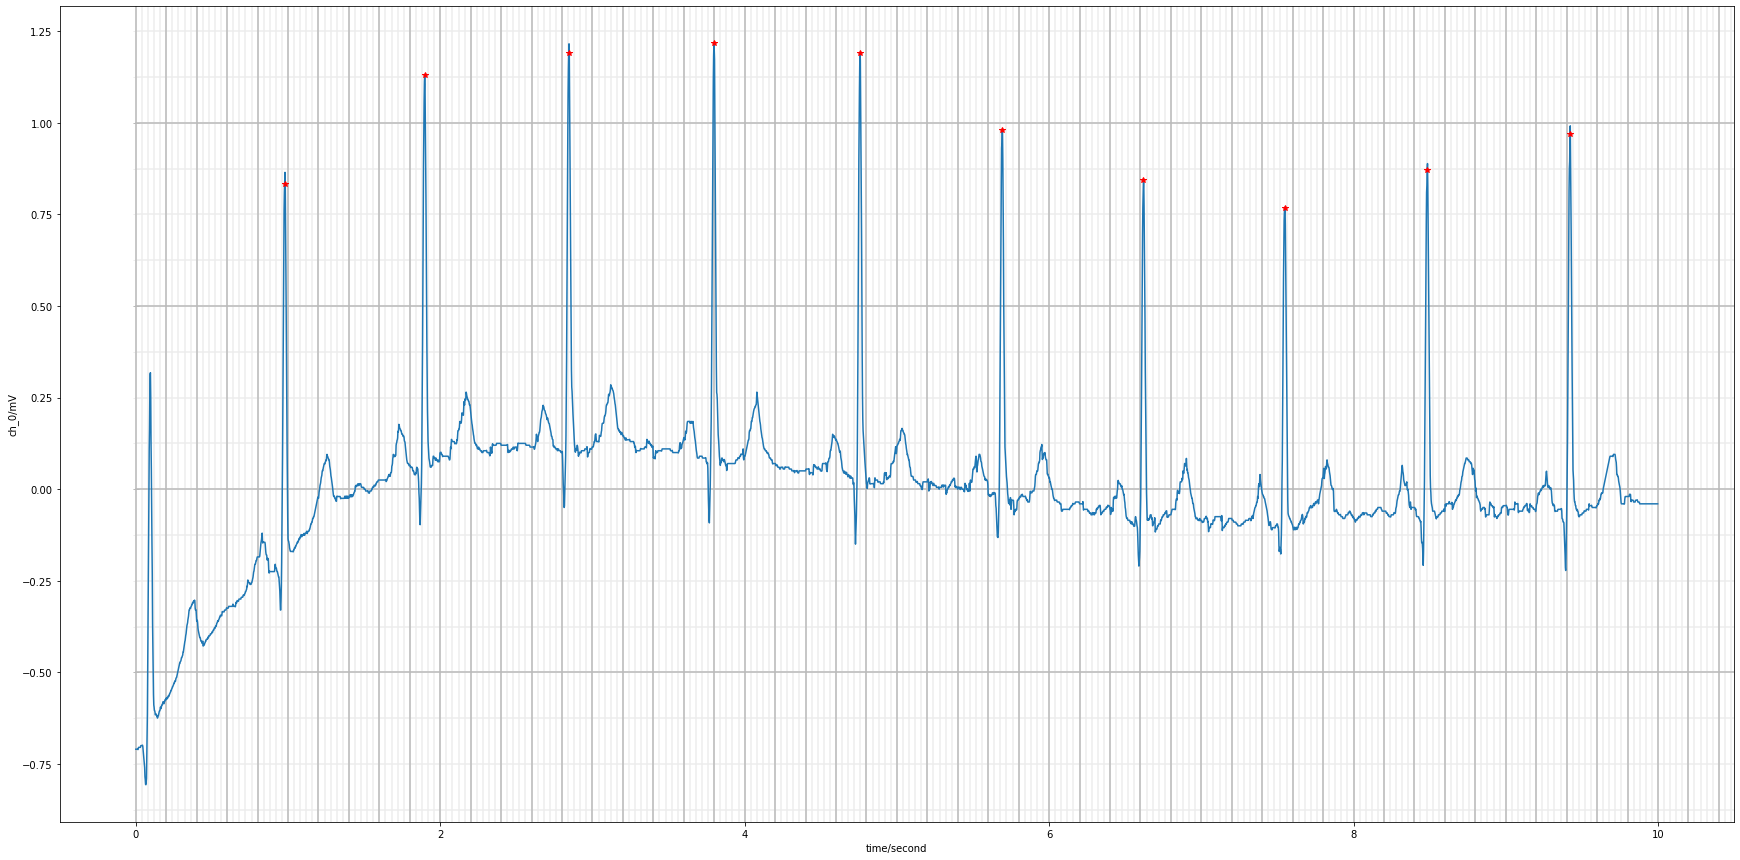

In [ ]:
xqrs = processing.XQRS(sig=sig[:,0], fs=fields['fs'])
xqrs.detect()
wfdb.plot.plot_items(signal=sig,fs=fields['fs'], sig_units= ['mV'], ann_samp=[xqrs.qrs_inds], time_units='seconds', figsize=(30,15), ecg_grids='all') #Plotting the detected QRS complex in the signal plotting a tick on the R wave.


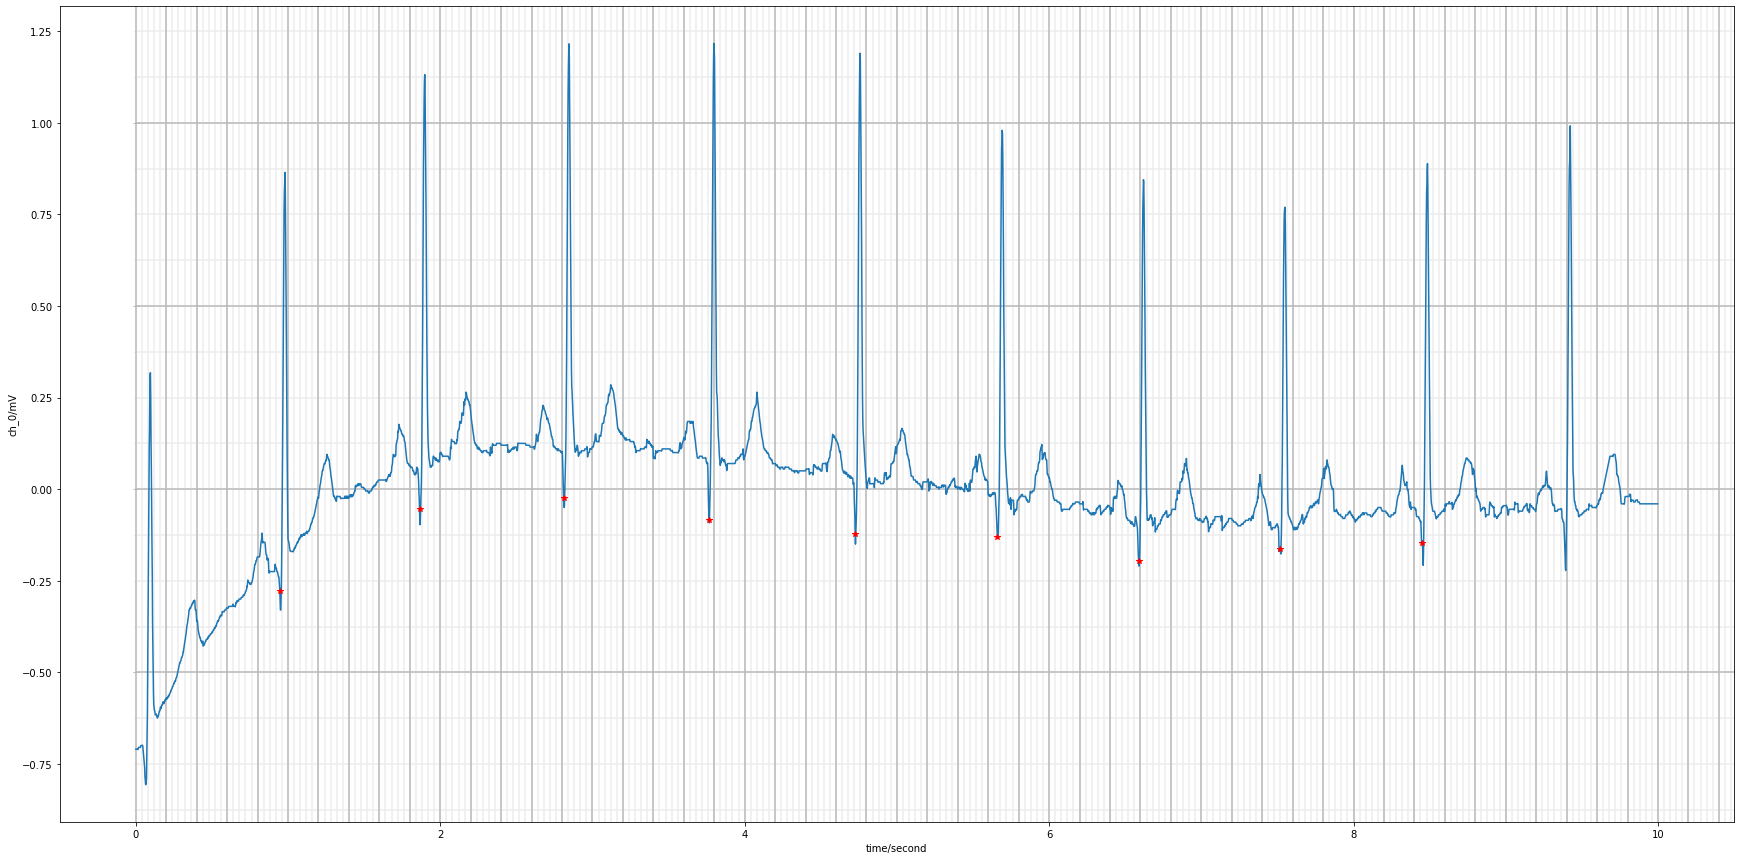

In [ ]:
record = wfdb.rdrecord('01000_hr', pn_dir='ptb-xl/1.0.2/records500/01000/', channels=[0], physical=False) 

qrs_locs  = processing.gqrs_detect(d_sig=record.d_signal[:,0],fs=record.fs, adc_gain=record.adc_gain[0],adc_zero=record.adc_zero[0])

wfdb.plot_items(signal=sig,fs=fields['fs'], sig_units= ['mV'],time_units='seconds', ann_samp=[qrs_locs], figsize=(30,15), ecg_grids='all')#Checking the detected QRS complex in the signal and plotting a tick on the Q wave.



**Identifying the heart beat of the signal, average and total heart beat in the signal.**

In [ ]:
sig, fields = wfdb.rdsamp('01000_hr', pn_dir='ptb-xl/1.0.2/records500/01000/', channels=[0]) # Reading the signal.
xqrs = processing.XQRS(sig = sig[:,0], fs=fields['fs'])
xqrs.detect()
instant_hr=wfdb.processing.compute_hr(10001,xqrs.qrs_inds, fs=record.fs)
np.set_printoptions(threshold=sys.maxsize)
print("Patient s heart rates during the ECG:"+ str(instant_hr))  # Printing patient's heart rates during the ECG. 

Learning initial signal parameters...
Failed to find 8 beats during learning.
Initializing using default parameters
Running QRS detection...
QRS detection complete.
Patient s heart rates during the ECG:[      nan       nan       nan       nan       nan       nan       nan
       nan       nan       nan       nan       nan       nan       nan
       nan       nan       nan       nan       nan       nan       nan
       nan       nan       nan       nan       nan       nan       nan
       nan       nan       nan       nan       nan       nan       nan
       nan       nan       nan       nan       nan       nan       nan
       nan       nan       nan       nan       nan       nan       nan
       nan       nan       nan       nan       nan       nan       nan
       nan       nan       nan       nan       nan       nan       nan
       nan       nan       nan       nan       nan       nan       nan
       nan       nan       nan       nan       nan       nan       nan
       nan       

In [ ]:
qrs_locs= processing.gqrs_detect(d_sig=record.d_signal[:,0],fs=record.fs, adc_gain=record.adc_gain[0],adc_zero=record.adc_zero[0])
rr = wfdb.processing.calc_rr(qrs_locs, fs=None, min_rr=None, max_rr=None, qrs_units='samples', rr_units='samples') # Calculating the rr intervals. 
mean_hr= wfdb.processing.calc_mean_hr(rr, fs=record.fs, min_rr=None, max_rr=None, rr_units='samples') # Calculating the patient's mean heart rate. 
print('The mean heart rate computed using the rr intervals is: '+ str(mean_hr)+" beats/minute")

The mean heart rate computed using the rr intervals is: 63.948840927258196 beats/minute


In [ ]:
x =wfdb.processing.compute_hr(10001,xqrs.qrs_inds, fs=record.fs)
x = x[~np.isnan(x)]
print('The mean heart rate computed applying the arithmetic method is: '+ str(np.mean(x)))

The mean heart rate computed applying the arithmetic method is: 64.04222


**READING DIAGNOSIS USING .CSV FILES:**


In [ ]:
ptbxl_df = pd.read_csv("/content/ptbxl_database.csv",index_col="ecg_id", sep=",", lineterminator= "\n" )
ptbxl_df.scp_codes = ptbxl_df.scp_codes.apply(lambda x: ast.literal_eval(x))
print(ptbxl_df.head())


        patient_id   age  sex  height  weight  nurse  site     device  \
ecg_id                                                                  
1          15709.0  56.0    1     NaN    63.0    2.0   0.0  CS-12   E   
2          13243.0  19.0    0     NaN    70.0    2.0   0.0  CS-12   E   
3          20372.0  37.0    1     NaN    69.0    2.0   0.0  CS-12   E   
4          17014.0  24.0    0     NaN    82.0    2.0   0.0  CS-12   E   
5          17448.0  19.0    1     NaN    70.0    2.0   0.0  CS-12   E   

             recording_date                                  report  ...  \
ecg_id                                                               ...   
1       1984-11-09 09:17:34  sinusrhythmus periphere niederspannung  ...   
2       1984-11-14 12:55:37     sinusbradykardie sonst normales ekg  ...   
3       1984-11-15 12:49:10              sinusrhythmus normales ekg  ...   
4       1984-11-15 13:44:57              sinusrhythmus normales ekg  ...   
5       1984-11-17 10:43:15     

In [ ]:
scp_df = pd.read_csv("/content/scp_statements.csv",index_col=[0], sep=",", lineterminator= "\n" )
print(scp_df.head())
scp_df = scp_df[scp_df.diagnostic == 1]


                          description  diagnostic  form  rhythm  \
NDT    non-diagnostic T abnormalities         1.0   1.0     NaN   
NST_          non-specific ST changes         1.0   1.0     NaN   
DIG                  digitalis-effect         1.0   1.0     NaN   
LNGQT                long QT-interval         1.0   1.0     NaN   
NORM                       normal ECG         1.0   NaN     NaN   

      diagnostic_class diagnostic_subclass  \
NDT               STTC                STTC   
NST_              STTC                NST_   
DIG               STTC                STTC   
LNGQT             STTC                STTC   
NORM              NORM                NORM   

                                      Statement Category  \
NDT                    other ST-T descriptive statements   
NST_   Basic roots for coding ST-T changes and abnorm...   
DIG                    other ST-T descriptive statements   
LNGQT                  other ST-T descriptive statements   
NORM                

In [ ]:
def diag_des(x):
    tmp = []
    for key in x.keys():
        if key in scp_df.index :
            tmp.append(scp_df.loc[key].diagnostic_class)
            tmp.append(scp_df.loc[key].description)
    return list(set(tmp))

ptbxl_df.scp_codes.apply(diag_des)
print(ptbxl_df.head())

        patient_id   age  sex  height  weight  nurse  site     device  \
ecg_id                                                                  
1          15709.0  56.0    1     NaN    63.0    2.0   0.0  CS-12   E   
2          13243.0  19.0    0     NaN    70.0    2.0   0.0  CS-12   E   
3          20372.0  37.0    1     NaN    69.0    2.0   0.0  CS-12   E   
4          17014.0  24.0    0     NaN    82.0    2.0   0.0  CS-12   E   
5          17448.0  19.0    1     NaN    70.0    2.0   0.0  CS-12   E   

             recording_date                                  report  ...  \
ecg_id                                                               ...   
1       1984-11-09 09:17:34  sinusrhythmus periphere niederspannung  ...   
2       1984-11-14 12:55:37     sinusbradykardie sonst normales ekg  ...   
3       1984-11-15 12:49:10              sinusrhythmus normales ekg  ...   
4       1984-11-15 13:44:57              sinusrhythmus normales ekg  ...   
5       1984-11-17 10:43:15     

**Documentation used:**

Access to the dataset: https://physionet.org/content/ptb-xl/1.0.2/

https://docplayer.net/212758321-Wfdb-documentation-release-chen-xie-julien-dubiel-apr-29-2020.html

https://wfdb.readthedocs.io/en/latest/processing.html

https://wfdb.readthedocs.io/en/latest/plot.html

https://wfdb.readthedocs.io/en/latest/wfdb.html

https://github.com/idoven/Idoven-Data-Scientist

**Comments:**

I really enjoyed and learned working on this Data Science Task, as you cite in the task description: "Also, we don't know how long this should take you, but we're not looking to reward the person that spends the most time on it. We believe in working smarter not harder." I tried to accomplish all the issues using as less code as possible and using already exisisting libraries in order to make the most efficient code. 